# Ridge

导入相关模块

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

读入示例数据并划分

In [7]:
data = pd.read_csv('../data/abalone.csv')
data['Sex'] = data['Sex'].map({'M':0, 'F':1, 'I':2})
X = data.drop(['Rings'], axis=1)
y = data[['Rings']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3132, 8) (3132, 1) (1045, 8) (1045, 1)


模型参数初始化

In [8]:
# 定义参数初始化函数
def initialize(dims):
    w = np.zeros((dims, 1))
    b = 0
    return w, b

定义L2损失函数和梯度计算

In [9]:
# 定义ridge损失函数
def l2_loss(X, y, w, b, alpha):
    num_train = X.shape[0]
    num_feature = X.shape[1]
    y_hat = np.dot(X, w) + b
    loss = np.sum((y_hat-y)**2)/num_train + alpha*(np.sum(np.square(w)))
    dw = np.dot(X.T, (y_hat-y)) /num_train + 2*alpha*w
    db = np.sum((y_hat-y)) /num_train
    return y_hat, loss, dw, db


定义Ridge训练过程

In [10]:
# 定义训练过程
def ridge_train(X, y, learning_rate=0.001, epochs=5000):
    loss_list = []
    w, b = initialize(X.shape[1])
    for i in range(1, epochs):
        y_hat, loss, dw, db = l2_loss(X, y, w, b, 0.1)
        w += -learning_rate * dw
        b += -learning_rate * db
        loss_list.append(loss)
        
        if i % 100 == 0:
            print('epoch %d loss %f' % (i, loss))
        params = {
            'w': w,
            'b': b
        }
        grads = {
            'dw': dw,
            'db': db
        }
    return loss, loss_list, params, grads

执行示例训练

In [11]:
# 执行训练示例
loss, loss_list, params, grads = ridge_train(X_train, y_train, 0.01, 1000)

epoch 100 loss 11.592486
epoch 200 loss 9.899418
epoch 300 loss 9.188318
epoch 400 loss 8.736898
epoch 500 loss 8.412844
epoch 600 loss 8.170698
epoch 700 loss 7.986990
epoch 800 loss 7.846735
epoch 900 loss 7.739423


模型参数

In [12]:
params

{'w': array([[-0.17293966],
        [ 1.13469988],
        [ 0.91637167],
        [ 0.34663854],
        [ 1.89963453],
        [ 0.52268839],
        [ 0.39259163],
        [ 0.74318144]]),
 'b': 6.804705734276612}

定义模型预测函数

In [13]:
# 定义预测函数
def predict(X, params):
    w = params['w']
    b = params['b']
    
    y_pred = np.dot(X, w) + b
    return y_pred

y_pred = predict(X_test, params)
y_pred[:5]

array([[ 8.95480035],
       [ 8.58620569],
       [ 9.74997627],
       [10.38142778],
       [ 9.77250701]])

测试集数据和模型预测数据的绘图展示

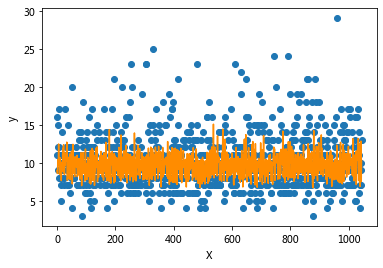

In [14]:
# 简单绘图
import matplotlib.pyplot as plt
f = X_test.dot(params['w']) + params['b']

plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X')
plt.ylabel('y')
plt.show();